# Capstone Project NLP - Kelompok 2
Anggota Kelompok :
- Dhiwa Aqsha - Universitas Tarumanagara - Teknik Informatika - MSIB Batch 6
- Disky Phiter Budiyansyah - Universitas Krisnadwipayana - Teknik Informatika - MSIB Batch 6
- Devi Andiska P - Universitas Amikom Yogyakarta - Sistem Informasi - MSIB Batch 6
- Dithyo Danoetirto Wahid - Universitas Dinamika - Teknik Komputer - MSIB Batch 6
- Fa'iq Rindha Maulana - Universitas Diponegoro - Informatika - MSIB Batch 6
- Defin Surjaniah - institut teknologi Sumatera - teknik informatika - MSIB Batch 6
- Dian L Dabukke - Institut Teknologi Sepuluh Nopember - Teknik Informatika

### Problem Statement

Masalah yang ingin saya selesaikan adalah mengidentifikasi job posting asli dan palsu. Dengan meningkatnya penggunaan platform daring untuk mencari pekerjaan, munculnya iklan lowongan kerja palsu menjadi ancaman serius bagi para pencari kerja. Job posting palsu ini dapat menyebabkan kerugian finansial dan emosional bagi para pelamar yang tertipu. Oleh karena itu, diperlukan suatu model yang mampu membedakan antara job posting asli dan palsu secara otomatis dan akurat.

### Prediksi apakah sebuah lowongan pekerjaan termasuk palsu atau asli
Project ini akan membuat model klasifikasi yang dapat mempelajari dan mengindetifikasi deskripsi pekerjaan yang bersifat penipuan.\
Kami akan menggunakan model LSTM (Long short-term memory) untuk kasus prediksi.

### Background

Pentingnya mengidentifikasi job posting palsu didasarkan pada beberapa faktor:
1.   **Meningkatnya Penipuan**: Seiring dengan bertambahnya penggunaan platform daring untuk mencari pekerjaan, jumlah penipuan job posting juga meningkat. Penipu memanfaatkan ketidakmampuan pencari kerja untuk memverifikasi keaslian iklan lowongan.
2.   **Dampak Negatif pada Pelamar Kerja**: Job posting palsu dapat menyebabkan kerugian finansial, seperti biaya yang dikeluarkan untuk aplikasi palsu, serta dampak psikologis yang merugikan, seperti stres dan kehilangan kepercayaan diri.
3.   **Kebutuhan untuk Solusi Otomatis**: Mengingat volume data yang besar, solusi manual untuk memverifikasi keaslian job posting tidak efisien dan memakan waktu. Oleh karena itu, dibutuhkan model otomatis yang dapat melakukan tugas ini dengan cepat dan akurat.

### Overview of Dataset
Dataset terdiri dari 18 ribu data yang berisi deskripsi pekerjaan.\
Dataset dapat diidentifikasi palsu atau penipuan melalui kolom "fraudulent".\
Dataset diambil dari website kaggle dengan format csv. Klik [disini](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction/data) untuk melihat dataset.\
Berikut merupakan penjelasan dari setiap kolum:
- **title**: Judul atau nama posisi pekerjaan yang diiklankan.
- **location**: Lokasi di mana pekerjaan tersebut berada atau tersedia.
- **department**: Departemen atau divisi spesifik dalam organisasi tempat posisi pekerjaan tersebut berada.
- **salary_range**: Rentang gaji yang ditawarkan.
- **company_profile**: Deskripsi perusahaan yang merekrut, termasuk latar belakangnya, misi, nilai-nilai, produk, dan layanan.
- **description**: Deskripsi detail tentang peran pekerjaan, tanggung jawab, tugas, dan kualifikasi yang diperlukan.
- **requirements**: Persyaratan atau kualifikasi spesifik yang harus dipenuhi kandidat untuk dipertimbangkan dalam pekerjaan, seperti pendidikan, pengalaman, keterampilan, sertifikasi, dll.
- **benefits**: Manfaat tambahan atau keuntungan yang ditawarkan kepada karyawan, seperti asuransi kesehatan, rencana pensiun, hari libur, dll.
- **telecommuting**: Menunjukkan apakah pekerjaan menawarkan opsi bekerja dari jarak jauh atau remote (1 untuk ya, 0 untuk tidak).
- **has_company_logo**: Menunjukkan apakah perusahaan memiliki logo atau tidak (1 untuk ya, 0 untuk tidak).
- **has_questions**: Apakah posting pekerjaan memiliki pertanyaan skrining untuk pelamar (1 untuk ya, 0 untuk tidak).
- **employment_type**: Jenis pekerjaan yang ditawarkan untuk posisi pekerjaan, seperti penuh waktu, paruh waktu, kontrak, sementara, dll.
- **required_experience**: Tingkat pengalaman yang diperlukan untuk peran pekerjaan, seperti pemula, menengah, senior, dll.
- **required_education**: Tingkat pendidikan minimum yang diperlukan untuk pekerjaan, seperti sekolah menengah atas, gelar sarjana, gelar magister, dll.
- **industry**: Sektor industri dari perusahaan. seperti teknologi, keuangan, perawatan kesehatan, dll.
- **function**: Fungsi spesifik atau area spesialisasi dalam industri tersebut, seperti penjualan, pemasaran, rekayasa, dll.
- **fraudulent**: Menunjukkan apakah posting pekerjaan ditandai sebagai penipuan (1 untuk ya, 0 untuk tidak).

## Import Library

In [1]:
# Import Libraries

import re, string
import nltk
from string import punctuation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.layers import Embedding, TextVectorization, Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from keras.callbacks import EarlyStopping

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from textblob import Word


from warnings import filterwarnings
filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Data Loading and Cleaning

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp '/content/kaggle.json' ~/.kaggle

cp: cannot stat '/content/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

Dataset URL: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
License(s): CC0-1.0
 56% 9.00M/16.1M [00:00<00:00, 23.4MB/s]
100% 16.1M/16.1M [00:00<00:00, 39.5MB/s]


In [5]:
!unzip /content/real-or-fake-fake-jobposting-prediction.zip

Archive:  /content/real-or-fake-fake-jobposting-prediction.zip
  inflating: fake_job_postings.csv   


In [6]:
df = pd.read_csv('/content/real-or-fake-fake-jobposting-prediction.zip')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


> Masih banyak kolum yang tidak dibutuhkan pada kasus ini, beberapa kolum akan dihapus dan digabungkan menjadi 1 kolum saja.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


> Terdapat 5 kolom berbentuk numerik, kita dapat menghapus kolom tersebut karena tidak digunakan untuk klasifikasi teks NLP.
>
> Kolum fraudulent tidak perlu dihapus karena merupakan kelas target.

In [9]:
# Menghapus kolum yang tidak dibutuhkan
df = df.drop(columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type'])

In [10]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
# Melihat kolum apa saja yang ada pada dataset
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [12]:
# Check null
df.isna().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2696
benefits                7212
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Seperti yang kita lihat terdapat banyak sekali nilai null pada dataset, maka dari itu kita dapat mengisi nilai null tersebut dengan spasi.

In [13]:
df.fillna(' ', inplace=True)

In [14]:
df.isna().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

Sudah tidak ada data yang null

In [15]:
# Check data yang duplikat
df.duplicated().sum()

313

Dataset memiliki data yang duplikat, oleh karena itu kita bisa menghapus data duplikat agar lebih bersih

In [16]:
# Menghapus data duplikat
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
df.shape

(17567, 12)

## Visualization

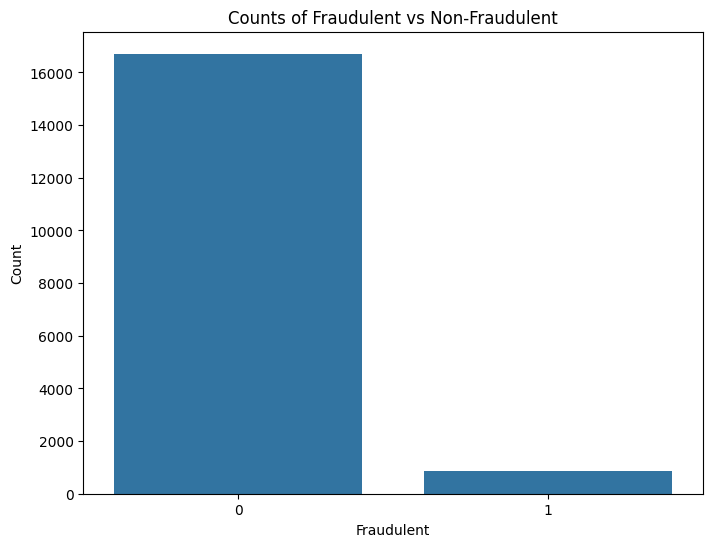

,fraudulent,title
0,0,16712
1,1,855


In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['fraudulent'].value_counts().index, y=df['fraudulent'].value_counts().values)
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Counts of Fraudulent vs Non-Fraudulent')
plt.show()

df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

Distribusi data 'fraudulent', dapat kita lihat dari visualisasi di atas bahwa nilai '0' atau bukan penipuan lebih banyak dibanding '1' atau fraud.

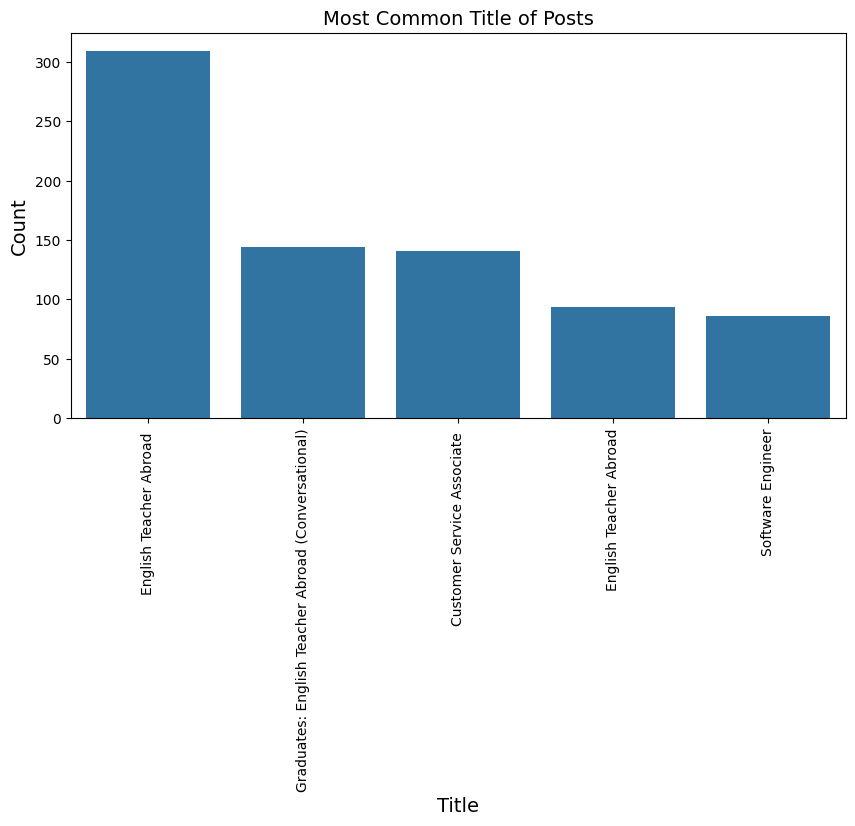

In [19]:
plt.figure(figsize = (10,5))
sns.barplot(x = df.title.value_counts()[:5].index, y = df.title.value_counts()[:5] )
plt.title("Most Common Title of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Title", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

Dari visualisasi di atas, pekerjaan yang paling banyak dicari adalah guru bahasa inggris

Text(0.5, 0, 'Countries')

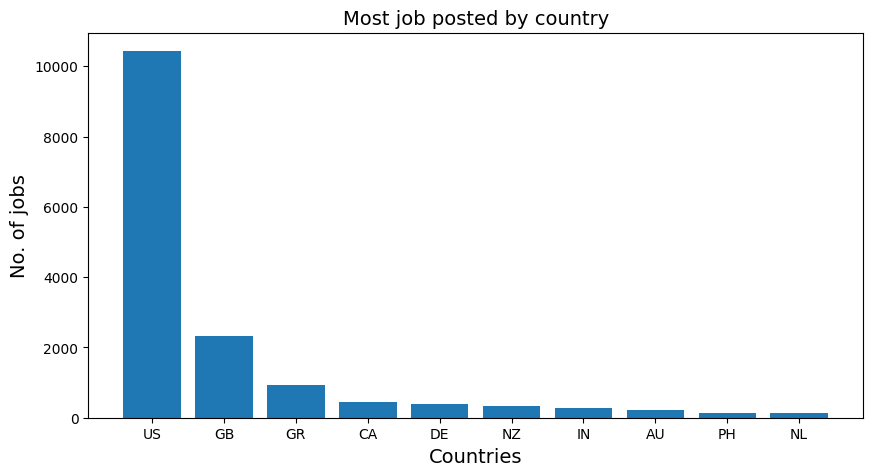

In [20]:
def split(location):
    l = location.split(',')
    return l[0]

df['country'] = df.location.apply(split)
country = dict(df.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(10,5))
plt.title('Most job posted by country', fontdict = {"fontsize" : 14})
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', fontdict = {"fontsize" : 14})
plt.xlabel('Countries', fontdict = {"fontsize" : 14})

Negara dengan postingan pekerjaan terbanyak adalah Amerika Serikat.

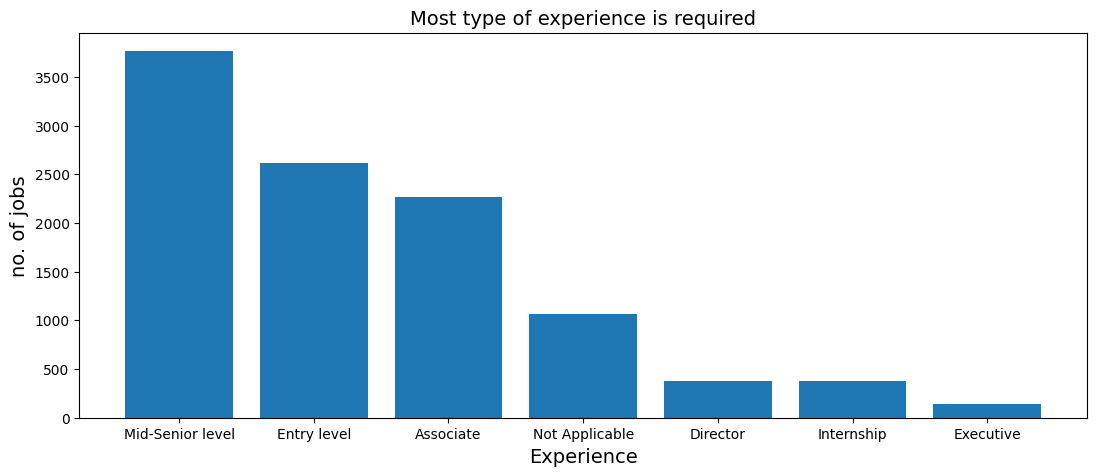

In [21]:
experience = dict(df.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(13,5))
plt.bar(experience.keys(), experience.values())
plt.title('Most type of experience is required', fontdict = {"fontsize" : 14})
plt.xlabel('Experience', fontdict = {"fontsize" : 14})
plt.ylabel('no. of jobs', fontdict = {"fontsize" : 14})
plt.show()

Tingkat pengalaman yang paling banyak dibutuhkan adalah Middle senior level.

## EDA & Text Preporcessing

In [22]:
df['combined_text'] = df['title']+' '+df['location']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+df['industry']
df = df.drop(columns=['title', 'location', 'department', 'description', 'company_profile', 'requirements', 'benefits', 'required_experience', 'required_education', 'industry', 'function', 'country'])

Sebelum kita melakukan EDA dan Cleaning data, kita harus menggabungkan setiap kolum yang akan digunakan menjadi satu kolum.

In [23]:
df.head()

,fraudulent,combined_text
0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


Seperti kita lihat hanya terdapat 2 kolu yaitu 'fraudulent' sebagai kelas target dan 'combined_text'. Kolum lain yang sudah tidak dipakai dapat di hapus atau di hilangkan

In [24]:
fraudjobs_text_dirty = df[df.fraudulent==1].combined_text
actualjobs_text_dirty = df[df.fraudulent==0].combined_text

In [25]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

- Inisialisasi stopwords dan menambahkan punctuation kedalam stopwords agar nanti dapat dihapus
- inisialisasi lemmatizer untuk melakukan Lemmatization
- Saya menggunakan Lemmatization dari pada stemming dikarenakan untuk menyempurnakan kata dasarnya
- fungsi WordNetLemmatizer dibuat untuk mendapatkan bagian dari ucapan yang sesuai untuk setiap kata agar lebih akurat

In [26]:
def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stop_words]

  # Lemmatization
  tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

Fungsi text_preprocessing ini bertujuan untuk melakukan pra-pemrosesan teks atau menghilangkan elemen-elemen yang tidak relevan atau tidak diinginkan dalam teks.

In [27]:
df['combined_text_processed'] = df['combined_text'].apply(lambda x: text_preprocessing(x))
df.head()

,fraudulent,combined_text,combined_text_processed
0,0,"Marketing Intern US, NY, New York We're Food52...",marketing intern u ny new york 're food52 've ...
1,0,"Customer Service - Cloud Video Production NZ, ...",customer service cloud video production nz auc...
2,0,"Commissioning Machinery Assistant (CMA) US, IA...",commission machinery assistant cma u ia wever ...
3,0,"Account Executive - Washington DC US, DC, Wash...",account executive washington dc u dc washingto...
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou...",bill review manager u fl fort worth spotsource...


Saya membuat 1 kolum baru bernama `combined_text_processed` untuk menyimpan data yang sudah dibersihkan, dapat dilihat perbedaan data yang sudah dibersihkan dengan yang belum dibersihkan.

In [28]:
fraudjobs_text_cleaned = df[df.fraudulent==1].combined_text_processed
actualjobs_text_cleaned = df[df.fraudulent==0].combined_text_processed

### Wordcloud sebelum data dibersihkan

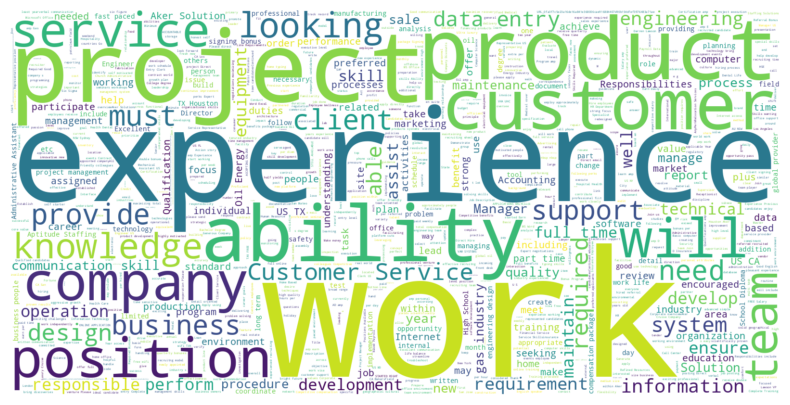

In [29]:
plt.figure(figsize = (10,5))
wc = WordCloud(background_color = "white", min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text_dirty)))
plt.axis("off")
plt.imshow(wc,interpolation = 'bilinear')

Data diatas merupakan teks yang tergolong penipuan dan belum dibersihkan.\
Dapat kita simpulkan berdasarkan visualisasi di atas, frekuensi kata kata yang paling sering muncul adalah experience, work, product, customer, ability, project, position, dll.

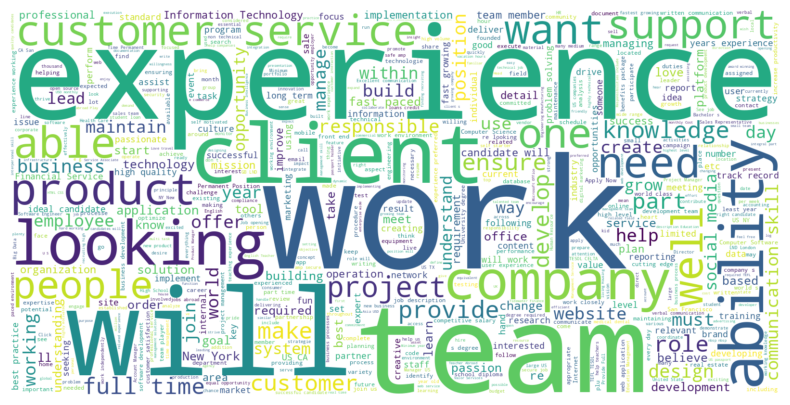

In [30]:
plt.figure(figsize = (10,5))
wc = WordCloud(background_color = "white", min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text_dirty)))
plt.axis("off")
plt.imshow(wc,interpolation = 'bilinear')

Data diatas merupakan teks yang tergolong asli dan belum dibersihkan.\
Dapat kita simpulkan berdasarkan visualisasi di atas, frekuensi kata kata yang paling sering muncul adalah will, work, team, client, experience, product, ability, project, dll.

### Wordcloud setelah text preprocessing

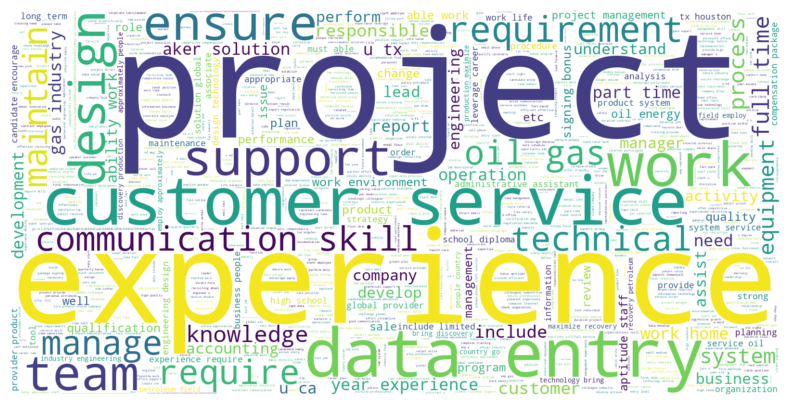

In [31]:
plt.figure(figsize = (10,5))
wc = WordCloud(background_color = "white", min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text_cleaned)))
plt.axis("off")
plt.imshow(wc,interpolation = 'bilinear')

Data diatas merupakan teks yang tergolong penipuan tetapi sudah melewati tahap preprocessing.\
Dapat kita simpulkan berdasarkan visualisasi di atas, frekuensi kata kata yang paling sering muncul adalah process, project, experience, customer service, support, design, ensure, manage, dll.

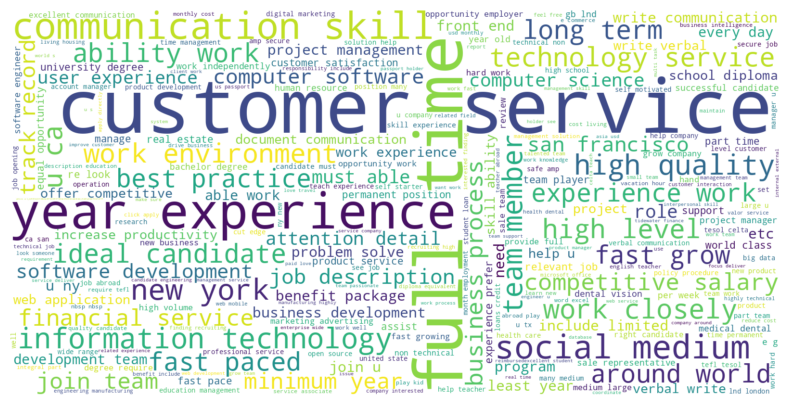

In [32]:
plt.figure(figsize = (10,5))
wc = WordCloud(background_color = "white", min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text_cleaned)))
plt.axis("off")
plt.imshow(wc,interpolation = 'bilinear')

Data diatas merupakan teks yang tergolong penipuan tetapi sudah melewati tahap preprocessing.\
Dapat kita simpulkan berdasarkan visualisasi di atas, frekuensi kata kata yang paling sering muncul adalah full time, communication skill, customer service, year experience, social medium, fast grow, dll.

## Model Building

In [33]:
max_features = 10000

In [34]:
# Membuat Tokenizer
t = Tokenizer(num_words = max_features)
# fit tokenizer
t.fit_on_texts(df['combined_text_processed'])

In [35]:
encoded_docs = t.texts_to_sequences(df['combined_text_processed'])

In [36]:
joblib.dump(t, './tokinezer_file')

['./tokinezer_file']

In [37]:
df['word count'] = [len(i.split(' ')) for i in df['combined_text_processed']]

> Menambahkan kolom baru bernama `word count` yang berisi jumlah kata dalam setiap teks dalam kolom 'combined_text_processed'.

In [38]:
sent_length = df['word count'].max()

> Menghitung jumlah maksimum kata yang terdapat dalam satu baris.

In [39]:
embedded_docs = pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...    1  206  160]
 [   0    0    0 ...   48   27  299]
 [   0    0    0 ...  485   25 1496]
 ...
 [   0    0    0 ... 1517   47 2393]
 [   0    0    0 ...  152  909   24]
 [   0    0    0 ...   80  130   35]]


### Splitting Data

In [40]:
y = df['fraudulent'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y = y.reshape(-1,1)
y.shape

(17567, 1)

In [42]:
X = np.array(embedded_docs)
X.shape

(17567, 1445)

In [43]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)

> Membagi data menjadi dua yaitu data latih dan data uji.

In [44]:
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape )
print("y_train shape: ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape:  (15810, 1445)
X_test shape :  (1757, 1445)
y_train shape:  (15810, 1)
y_test shape :  (1757, 1)


### Model Architecture Definition

In [45]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

embedding_vector_features=40
model_lstm=Sequential()
model_lstm.add(Embedding(max_features,embedding_vector_features,input_length=sent_length))
model_lstm.add(Bidirectional(LSTM(32, return_sequences= True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm.add(Dropout(0.1))
model_lstm.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1445, 40)          400000    
                                                                 
 bidirectional (Bidirection  (None, 1445, 64)          18688     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 1445, 64)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

### Model Training

In [46]:
# Model Training using LSTM
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_lstm_hist = model_lstm.fit(X_train, y_train, epochs=25, batch_size = 64, validation_data=(X_test,y_test),  callbacks=[early_stopping])

Epoch 1/25
248/248 [==============================] - 88s 315ms/step - loss: 0.1625 - accuracy: 0.9589 - val_loss: 0.0977 - val_accuracy: 0.9732
Epoch 2/25
248/248 [==============================] - 65s 263ms/step - loss: 0.0573 - accuracy: 0.9843 - val_loss: 0.0877 - val_accuracy: 0.9767
Epoch 3/25
248/248 [==============================] - 53s 214ms/step - loss: 0.0275 - accuracy: 0.9932 - val_loss: 0.0915 - val_accuracy: 0.9755
Epoch 4/25
248/248 [==============================] - 50s 200ms/step - loss: 0.0153 - accuracy: 0.9965 - val_loss: 0.1066 - val_accuracy: 0.9767
Epoch 5/25
248/248 [==============================] - 47s 192ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.1088 - val_accuracy: 0.9755


Saya menggunakan epoch sebanyak 25, namun dikarenakan saya memakai early stopping untuk menghentikan pelatihan secara otomatis jika tidak ada peningkatan kinerja pada metrik validasi selama beberapa epoch berturut-turut. Maka pelatihan akan berhenti ketika dirasa sudah optimal.

### Model Evaluation

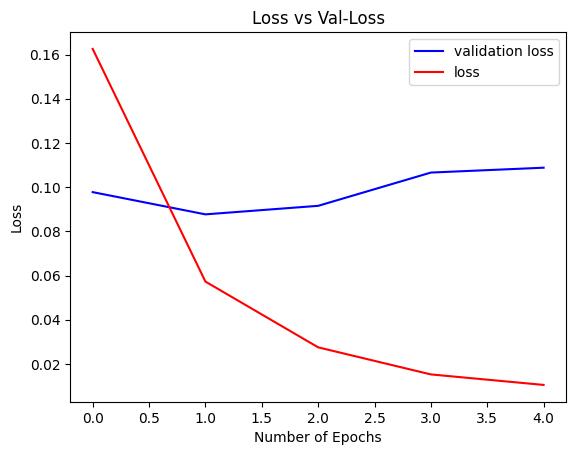

In [47]:
plt.plot(model_lstm_hist.history['val_loss'], color='b', label="validation loss")
plt.plot(model_lstm_hist.history['loss'], color='red', label="loss")
plt.title("Loss vs Val-Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

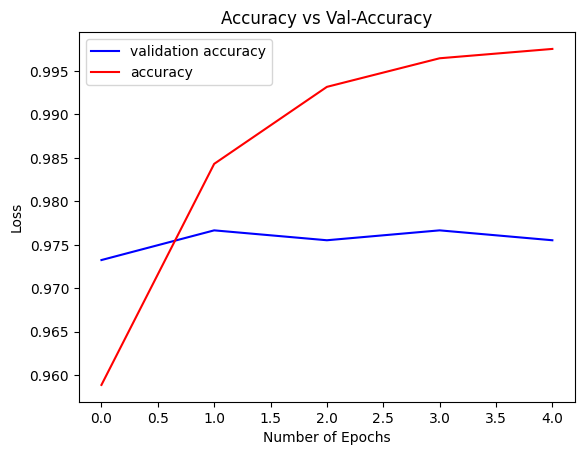

In [48]:
plt.plot(model_lstm_hist.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(model_lstm_hist.history['accuracy'], color='red', label="accuracy")
plt.title("Accuracy vs Val-Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [49]:
model_lstm.evaluate(X_test, y_test)

55/55 [==============================] - 4s 79ms/step - loss: 0.0877 - accuracy: 0.9767


[0.08768593519926071, 0.9766647815704346]

## Conclusion|

> - Berdasarkan hasil tersebut, dapat disimpulkan bahwa model yang dibuat sudah cukup baik dengan hasil akurasi sebesar 97.78% dan tingkat loss 0.08
> - Berdasarkan hasil dari pengetesan data latih dan data uji juga sangat baik.
> - Model sedikit overfitting namun tidak terlalu terlihat dikarenakan jarak antara latih dan uji tidak terlalu jauh.

In [50]:
# saving the model
model_lstm.save("job_prediction.h5")
!tar -zcvf job_prediction_model.tgz "job_prediction.h5"


job_prediction.h5


In [51]:
!tar -zcvf job_prediction_model.tgz "job_prediction.h5"

job_prediction.h5


In [52]:
loaded_model = load_model('job_prediction.h5')

## Model Deployment

In [54]:
!pip install -U -q ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [55]:
api_key='vD5MYd1qlPmuSio9ubmytdXmbUApziO74nS969CDjtAo'
location = 'us-south'

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

In [56]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

client.spaces.list(limit=5)

------------------------------------  ----------------------------------------  ------------------------
ID                                    NAME                                      CREATED
9b602fc8-d468-41cb-a19a-b140f78e4d00  Deployment Kelompok 2 - Capstone Project  2024-06-15T09:38:11.836Z
6d8cddd1-c3b8-4c45-979d-5c8b81cd106b  Capstone                                  2024-06-14T09:50:19.401Z
889c1e3c-484a-4a1a-8f4b-3de337b23f6d  Deploy                                    2024-06-11T00:42:01.970Z
------------------------------------  ----------------------------------------  ------------------------


,ID,NAME,CREATED
0,9b602fc8-d468-41cb-a19a-b140f78e4d00,Deployment Kelompok 2 - Capstone Project,2024-06-15T09:38:11.836Z
1,6d8cddd1-c3b8-4c45-979d-5c8b81cd106b,Capstone,2024-06-14T09:50:19.401Z
2,889c1e3c-484a-4a1a-8f4b-3de337b23f6d,Deploy,2024-06-11T00:42:01.970Z


In [57]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (
        next(item for item in space["resources"] if item["entity"]["name"] == space_name)["metadata"]["id"]
    )

space_uid = guid_from_space_name(client, "Deployment Kelompok 2 - Capstone Project")
print("Space UID - " + space_uid)

Space UID - 9b602fc8-d468-41cb-a19a-b140f78e4d00


In [58]:
space_id = space_uid #id dari space yg telah dibaut

client.set.default_space(space_id)

'SUCCESS'

In [59]:
# Publish model in Watson Machine Learning repository on Cloud
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-23.1-py3.10")
print(sofware_spec_uid)

336b29df-e0e1-5e7d-b6a5-f6ab722625b2


In [60]:
#Define model name, autor name and email.
metadata = {
    client.repository.ModelMetaNames.NAME: "LSTM Model - Kelompok 2",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.12",  # Tipe model TensorFlow yang digunakan
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

# Simpan model ke Watson Machine Learning
published_model = client.repository.store_model(
    model='job_prediction_model.tgz', #gunakan loaded_model untuk published_model
    meta_props=metadata,
    training_data=X_train, #gunakan train_dataset dari tf.data.Dataset
    training_target=y_train
)

In [61]:
published_model_id = client.repository.get_model_id(published_model)
published_model_id

'14e6b7d1-8758-4089-a18d-866ce2f41733'

In [62]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deploy LSTM model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_id,
                                               meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '14e6b7d1-8758-4089-a18d-866ce2f41733' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.
...
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='91213a22-e99b-4644-bf07-9501dbf54991'
------------------------------------------------------------------------------------------------




In [63]:
deployment_id = client.deployments.get_id(created_deployment)
deployment_id

'91213a22-e99b-4644-bf07-9501dbf54991'

## Testing

In [64]:
new_text = "Balanced Labs exists to improve the lives of accountants and their clients with intelligent and elegant tools. Weâ€™re an energetic team of ex-Xeroâ€™s, COOs, designers, and engineers based in San Francisco and Sydney.Â As our Communication Designer, you will help define our brand experience and how we communicate with our community.In this role, you will be responsible for our brand experience, and youâ€™ll work across our product and marketing design teams to define how our platform connects and resonates with our customers.You have a deep passion for communication design, and are willing to share your expertise with others.Balanced Labs is an Equal Opportunity Employer."
print(new_text)

Balanced Labs exists to improve the lives of accountants and their clients with intelligent and elegant tools. Weâ€™re an energetic team of ex-Xeroâ€™s, COOs, designers, and engineers based in San Francisco and Sydney.Â As our Communication Designer, you will help define our brand experience and how we communicate with our community.In this role, you will be responsible for our brand experience, and youâ€™ll work across our product and marketing design teams to define how our platform connects and resonates with our customers.You have a deep passion for communication design, and are willing to share your expertise with others.Balanced Labs is an Equal Opportunity Employer.


In [65]:
text_prepoc = text_preprocessing(new_text)

In [66]:
encoded_docs_testing = t.texts_to_sequences(text_prepoc)

In [67]:
embedded_docs_testing = pad_sequences(encoded_docs_testing,padding='pre',maxlen=sent_length)

In [68]:
testing_data = np.array(embedded_docs_testing)

In [70]:
scoring_payload = {"input_data": [{"values": testing_data}]}
deployment_id= '91213a22-e99b-4644-bf07-9501dbf54991'

predictions = client.deployments.score(deployment_id, scoring_payload)

In [71]:
scoring_response_json = predictions
print(scoring_response_json)

# Extracting and printing the prediction results
prediction = scoring_response_json['predictions'][0]
predicted_probabilities = prediction['values'][0][0]
predicted_class = prediction['values'][0][1]

print(f"Predicted class: {predicted_class}")
print(f"Predicted probabilities: {predicted_probabilities}")

{'predictions': [{'id': 'dense', 'fields': ['prediction', 'prediction_classes', 'probability'], 'values': [[[0.9519726634025574], [1], [0.9519726634025574]], [[0.9462406039237976], [1], [0.9462406039237976]], [[0.9451623558998108], [1], [0.9451623558998108]], [[0.9462406039237976], [1], [0.9462406039237976]], [[0.9459877610206604], [1], [0.9459877610206604]], [[0.9520154595375061], [1], [0.9520154595375061]], [[0.9499239325523376], [1], [0.9499239325523376]], [[0.953508198261261], [1], [0.953508198261261]], [[0.9451623558998108], [1], [0.9451623558998108]], [[0.9462406039237976], [1], [0.9462406039237976]], [[0.9519726634025574], [1], [0.9519726634025574]], [[0.953508198261261], [1], [0.953508198261261]], [[0.9499239325523376], [1], [0.9499239325523376]], [[0.9473137259483337], [1], [0.9473137259483337]], [[0.9523555040359497], [1], [0.9523555040359497]], [[0.9479550719261169], [1], [0.9479550719261169]], [[0.9426738023757935], [1], [0.9426738023757935]], [[0.9479550719261169], [1], [0